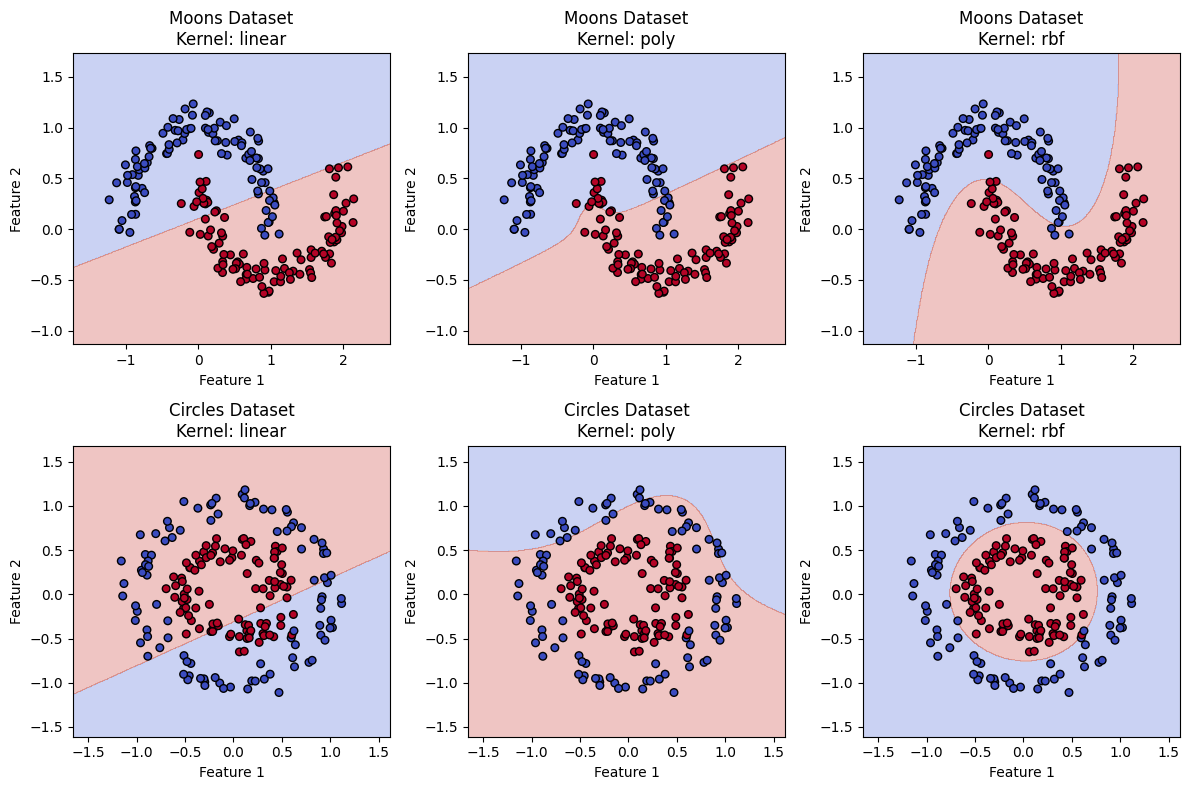

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_moons, make_circles

# Generate two synthetic datasets
X1, y1 = make_moons(n_samples=200, noise=0.1, random_state=42)
X2, y2 = make_circles(n_samples=200, noise=0.1, factor=0.5, random_state=42)

datasets = [(X1, y1, "Moons Dataset"), (X2, y2, "Circles Dataset")]

# Define different kernels to compare
kernels = ['linear', 'poly', 'rbf']

# Create subplots
fig, axes = plt.subplots(len(datasets), len(kernels), figsize=(12, 8))

for i, (X, y, title) in enumerate(datasets):
    for j, kernel in enumerate(kernels):
        # Create SVM model
        clf = svm.SVC(kernel=kernel, gamma='auto', C=1)
        clf.fit(X, y)

        # Plot decision boundary
        ax = axes[i, j]

        # Create grid
        x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
        y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                             np.linspace(y_min, y_max, 500))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Plot contour
        ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k')
        ax.set_title(f"{title}\nKernel: {kernel}")
        ax.set_xlabel("Feature 1")
        ax.set_ylabel("Feature 2")

plt.tight_layout()
plt.show()
